In [1]:
##importing all useful libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df_match = pd.read_csv("matches.csv")
df_match.head()

,Unnamed: 0,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [3]:
df_match.columns

Index(['Unnamed: 0', 'id', 'country_id', 'league_id', 'season', 'stage',
       'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=116)

In [4]:
##we will drop all unnecessary columns
df_match.drop(df_match.columns[12:116], axis=1, inplace = True)

In [5]:
df_match.drop(df_match.columns[[0,5,6]], axis=1, inplace = True)

In [6]:
##reading the country file
df_country = pd.read_csv("Countries.csv")
df_match.head()

,id,country_id,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,492473,9987,9993,1,1
1,2,1,1,2008/2009,492474,10000,9994,0,0
2,3,1,1,2008/2009,492475,9984,8635,0,3
3,4,1,1,2008/2009,492476,9991,9998,5,0
4,5,1,1,2008/2009,492477,7947,9985,1,3


In [7]:
##drop the unnamed column
df_country.drop(df_country[["Unnamed: 0"]],axis = 1, inplace = True)
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [8]:
df_league = pd.read_csv("leagues.csv")

In [9]:
df_league.rename(columns = {"name":"league","name.1":"country"},inplace = True)
df_league

,Unnamed: 0,id,country_id,league,id.1,country
0,0,1,1,Belgium Jupiler League,1,Belgium
1,1,1729,1729,England Premier League,1729,England
2,2,4769,4769,France Ligue 1,4769,France
3,3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,4,10257,10257,Italy Serie A,10257,Italy
5,5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,6,15722,15722,Poland Ekstraklasa,15722,Poland
7,7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,8,19694,19694,Scotland Premier League,19694,Scotland
9,9,21518,21518,Spain LIGA BBVA,21518,Spain


In [10]:
##now joining df_match with df_league on country id
df = pd.merge(left = df_league, right = df_match, how = 'left', left_on = 'country_id', right_on = "country_id")

In [11]:
df.head()  ##can drop id country_id/league_id

,Unnamed: 0,id_x,country_id,league,id.1,country,id_y,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,0,1,1,Belgium Jupiler League,1,Belgium,1,1,2008/2009,492473,9987,9993,1,1
1,0,1,1,Belgium Jupiler League,1,Belgium,2,1,2008/2009,492474,10000,9994,0,0
2,0,1,1,Belgium Jupiler League,1,Belgium,3,1,2008/2009,492475,9984,8635,0,3
3,0,1,1,Belgium Jupiler League,1,Belgium,4,1,2008/2009,492476,9991,9998,5,0
4,0,1,1,Belgium Jupiler League,1,Belgium,5,1,2008/2009,492477,7947,9985,1,3


In [12]:
df.drop(df[["league_id"]],axis = 1, inplace = True)

In [13]:
df.head()

,Unnamed: 0,id_x,country_id,league,id.1,country,id_y,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,0,1,1,Belgium Jupiler League,1,Belgium,1,2008/2009,492473,9987,9993,1,1
1,0,1,1,Belgium Jupiler League,1,Belgium,2,2008/2009,492474,10000,9994,0,0
2,0,1,1,Belgium Jupiler League,1,Belgium,3,2008/2009,492475,9984,8635,0,3
3,0,1,1,Belgium Jupiler League,1,Belgium,4,2008/2009,492476,9991,9998,5,0
4,0,1,1,Belgium Jupiler League,1,Belgium,5,2008/2009,492477,7947,9985,1,3


In [14]:
df_Tattributes = pd.read_csv("team_attributes.csv")
df_team = pd.read_csv("teams.csv")

In [15]:
df_Tattributes.drop(df_Tattributes[["id","team_fifa_api_id"]],axis =1, inplace = True)
df_team.drop(df_team[["id","team_fifa_api_id"]],axis = 1, inplace= True)

In [16]:
df_1 = pd.merge(left = df_team, right = df_Tattributes, how = "left", left_on = "team_api_id", right_on = "team_api_id")

In [17]:
df_1.drop(df_1[["team_long_name","date"]], axis = 1, inplace = True)
df.drop(df[["country_id"]],axis =1, inplace = True)

In [18]:
##merging df and df_1 on team_api_id and home/away_team_api_id
df = pd.merge(left = df, right = df_1, how = 'left', left_on = 'home_team_api_id', right_on = "team_api_id")

In [19]:
df.head()

,Unnamed: 0,id_x,league,id.1,country,id_y,season,match_api_id,home_team_api_id,away_team_api_id,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,0,1,Belgium Jupiler League,1,Belgium,1,2008/2009,492473,9987,9993,...,60.0,Normal,Organised,70.0,High,65.0,Press,70.0,Wide,Cover
1,0,1,Belgium Jupiler League,1,Belgium,1,2008/2009,492473,9987,9993,...,51.0,Normal,Organised,48.0,Medium,47.0,Press,54.0,Normal,Offside Trap
2,0,1,Belgium Jupiler League,1,Belgium,1,2008/2009,492473,9987,9993,...,56.0,Normal,Organised,47.0,Medium,45.0,Press,55.0,Normal,Cover
3,0,1,Belgium Jupiler League,1,Belgium,1,2008/2009,492473,9987,9993,...,56.0,Normal,Organised,47.0,Medium,45.0,Press,55.0,Normal,Cover
4,0,1,Belgium Jupiler League,1,Belgium,1,2008/2009,492473,9987,9993,...,56.0,Normal,Organised,47.0,Medium,45.0,Press,55.0,Normal,Cover


In [20]:
###since we only need 5 countires we will drop all columns which arent those countries
df = df.loc[df['country'].isin(df["country"].value_counts().index.tolist()[:5])]

In [21]:
##dropping buildUpPlayDribbling
df.drop(df[["buildUpPlayDribbling"]],axis = 1, inplace = True)

In [22]:
df_goals = df.groupby("country")

In [23]:
df_goals.mean()

,Unnamed: 0,id_x,id.1,id_y,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Unnamed: 0_x,team_api_id,Unnamed: 0_y,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
country,,,,,,,,,,,,,,,,,,,,
England,1.0,1729.0,1729.0,3248.500000,1.178767e+06,9142.275000,9142.275000,1.550987,1.159539,37.137500,9142.275000,790.706250,56.271875,52.368750,50.980208,56.805208,52.204167,45.041667,49.944792,51.048958
France,2.0,4769.0,4769.0,6286.715915,1.169834e+06,9879.933911,9830.500428,1.413355,1.030051,72.524377,9879.933911,801.854821,53.267606,48.291441,51.323944,54.499458,53.404117,46.835320,49.071506,52.771398
Germany,3.0,7809.0,7809.0,9030.143292,1.187018e+06,9184.736780,9179.564526,1.636414,1.271031,104.222092,9184.736780,634.944771,56.969448,47.350176,55.119859,52.627497,54.893067,50.669800,51.507638,51.367803
Italy,4.0,10257.0,10257.0,11759.691751,1.233176e+06,9512.414230,10331.056268,1.510803,1.105296,135.740323,9512.414230,669.830340,55.732968,44.946639,53.679380,52.946183,57.009578,42.794310,51.100507,50.701043
Spain,9.0,21518.0,21518.0,23032.637807,1.211601e+06,9040.616205,9031.444114,1.642352,1.131242,264.280384,9040.616205,745.479744,47.052239,44.796375,53.848614,54.672708,55.557569,48.864606,49.121535,55.990405


<AxesSubplot:xlabel='home_team_goal', ylabel='country'>

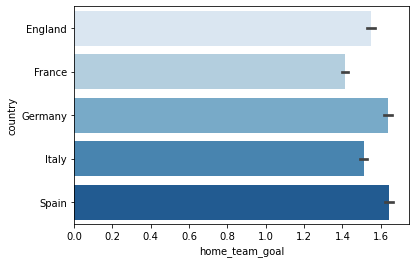

In [24]:
###PLOTTING THE AVERAGE GOALS OF EACH OF THE COUNTRIES
sns.barplot(x = "home_team_goal", y = 'country', data = df, palette = "Blues")

In [25]:
df_Pattributes= pd.read_csv("player_attributes.csv")

In [26]:
df_Pattributes.head()

,Unnamed: 0,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [33]:
df_Pattributes.drop(df_Pattributes[["date"]],axis = 1,inplace =True)

In [60]:
#####QUESTIONS TO ANSWER
##1. DOES PREFFERED FOOT AFFECT ATTACKING WORK RATE
##2. DOES VISION HAVE AN IMPACT ON OVERALL RATING
##3. ARE PENALTIES RELATED TO POTENTIAL 

In [41]:
###FOR 1ST QUESTION PLOTTING A GRAPH OF PREFFERED FOOT AND ATTACKING WORK RATE
df_Pattributes["attacking_work_rate"].unique()

array(['medium', 'high', nan, 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

<AxesSubplot:xlabel='attacking_work_rate', ylabel='count'>

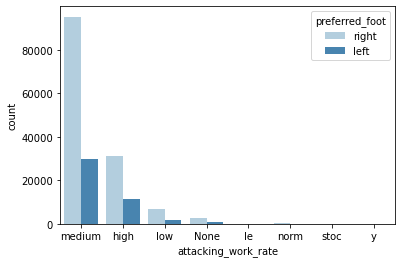

In [46]:
sns.countplot(data = df_Pattributes, x= "attacking_work_rate", hue = "preferred_foot", palette = "Blues")
##therefor its clear that ppl whose attacking work rate is medium are ppl whose preffered foot is right 

In [79]:
df_gr = df_Pattributes.groupby("defensive_work_rate").mean()

<AxesSubplot:xlabel='vision', ylabel='overall_rating'>

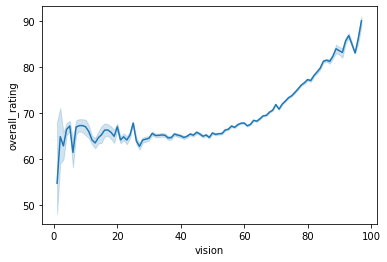

In [84]:
sns.lineplot(data =df_Pattributes,x = "vision", y = "overall_rating")
##playes who have a higher vision have a better rating

/Users/jasleengill/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:154: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f7a8b064fa0> has a label of '_0' which cannot be automatically added to the legend.
  ax_obj.legend(handles, labels, title=self.variables["hue"], **legend_kws)


<AxesSubplot:xlabel='potential', ylabel='Density'>

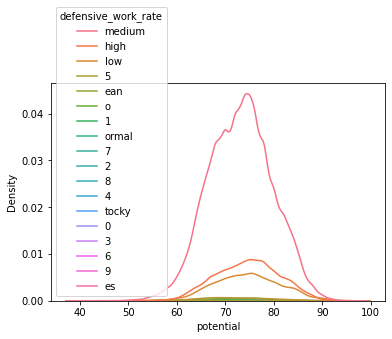

In [98]:

sns.kdeplot( data = df_Pattributes, x= "potential", hue = "defensive_work_rate")


In [ ]:
##couldnt understand the seconf visualization question 